In [1]:
import numpy as np
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

import scipy
import scipy.signal
from scipy.spatial import distance
import librosa
import matplotlib.lines as lines
import matplotlib.pyplot as plt

import itertools
import seaborn as sns

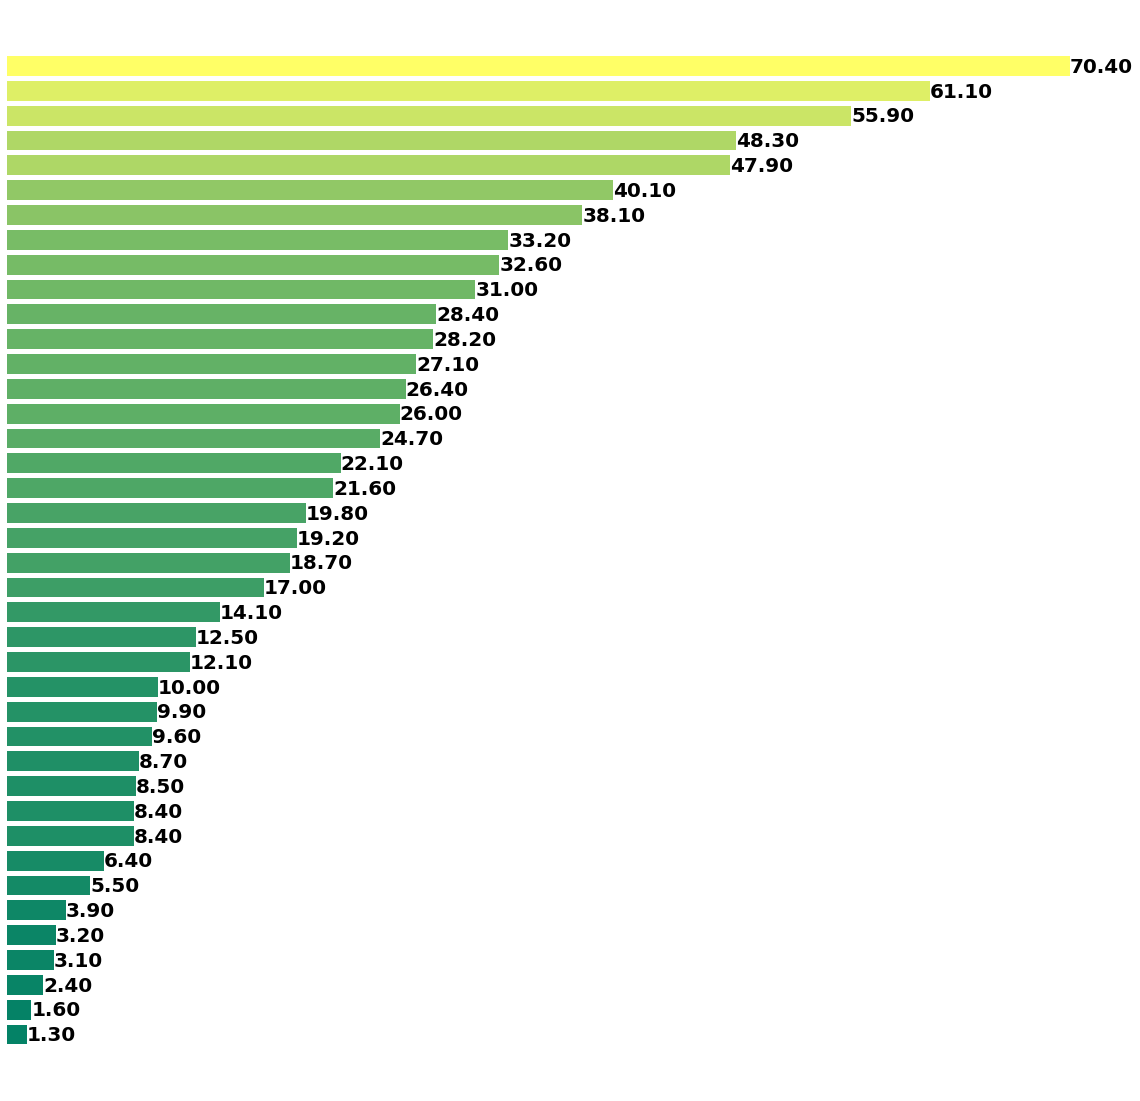

In [16]:
values = []
labels = []
with open(Path('40_per_keyword_classes.txt'), 'r') as f:
    for line in f:
        parts = line.split()
        score = parts[-1]
        word = ' '.join(parts[0:-1])
#         print(word, score)
        values.append(float(score))
        labels.append(word)
        
indices = np.argsort(values)
sorted_labels = []
sorted_values = []
for i in range(len(labels)):
    sorted_labels.append(labels[indices[i]])
    sorted_values.append(values[indices[i]])
plt.figure(figsize=(20, 20))
colors = cm.summer(np.asarray(sorted_values) / float(max(np.asarray(sorted_values))))
plt.barh(sorted_labels, sorted_values, color=colors, align='center')
for i, v in enumerate(sorted_values):
    if v != 0: plt.text(x=v, y=i-0.25, s=f'{v:<.2f}', color='black', fontweight='bold', fontsize=20)
plt.xticks([])
plt.yticks(fontsize=20)
plt.axis('off')
plt.savefig('40-way_keyword_analyses.png')